# Top 10 pandas tips and tricks

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import load_dataset

pd.set_option('display.max_columns', None)

In [3]:
diamonds = load_dataset("diamonds")
tips = load_dataset("tips")
dow = load_dataset("dowjones")
crashes = load_dataset("car_crashes")
glue = load_dataset("glue")
taxis = load_dataset("taxis")

# 1. Convert all columns to lowercase and remove whitespace

In [4]:
df = pd.DataFrame({
    "User  ID": [1, 1, 1, 1, 2, 2, 2, 2],
    "product/description": ["iphone 11"] * 4 + ["samsung s20"] * 4,
    "price": np.random.randn(8) + 10,
})
df

,User ID,product/description,price
0,1,iphone 11,11.756733
1,1,iphone 11,11.022684
2,1,iphone 11,9.753071
3,1,iphone 11,9.855838
4,2,samsung s20,9.757330
5,2,samsung s20,8.069593
6,2,samsung s20,11.352987
7,2,samsung s20,9.816936


In [5]:
df.columns

Index(['User  ID', 'product/description', 'price'], dtype='object')

In [6]:
import re

def clean_column(s):
    s = str(s)                          # convert to string just in case
    s = re.sub("/", " ", s)             # replace / for whitespace
    s = re.sub(" {1,}", " ", s)         # replace multiple whitespaces to one whitespace  
    s = re.sub(" ", "_", s)             # replace a whitespace for _
    return s.lower()    

In [7]:
clean_column('User  ID')

'user_id'

In [8]:
clean_column('product/description')

'product_description'

In [9]:
df.columns = [clean_column(col) for col in df.columns]
df.columns

Index(['user_id', 'product_description', 'price'], dtype='object')

In [11]:
# Cleaned data, now we can use df.user_id syntax!
df.head()

,user_id,product_description,price
0,1,iphone 11,11.756733
1,1,iphone 11,11.022684
2,1,iphone 11,9.753071
3,1,iphone 11,9.855838
4,2,samsung s20,9.757330


# 2. Select columns by dtype

In [14]:
diamonds.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [15]:
diamonds.select_dtypes(["category", "int"])

,cut,color,clarity,price
0,Ideal,E,SI2,326
1,Premium,E,SI1,326
2,Good,E,VS1,327
3,Premium,I,VS2,334
4,Good,J,SI2,335
...,...,...,...,...
53935,Ideal,D,SI1,2757
53936,Good,D,SI1,2757
53937,Very Good,D,SI1,2757
53938,Premium,H,SI2,2757


# 3. Group by multiple columns - Avoid MultiIndex output

In [16]:
cols = ['cut', 'color', 'clarity', 'price']

agg_price = (
    diamonds
    [cols]                                  # select columns using a list!
    .groupby(['cut', 'color', 'clarity'],   # group by 3 columns
             as_index=False)                # avoid the multi-index output
    .mean()                                 # aggregate the data
)
agg_price.head()

,cut,color,clarity,price
0,Ideal,D,IF,6567.178571
1,Ideal,D,VVS1,2705.777778
2,Ideal,D,VVS2,3619.014085
3,Ideal,D,VS1,2576.039886
4,Ideal,D,VS2,2111.927174


# 4. Select the top-n rows (nlargest, nsmallest)

This is generally useful after an aggregation

In [17]:
agg_price.nlargest(5, 'price')

,cut,color,clarity,price
112,Very Good,D,IF,10298.260870
168,Good,D,IF,10030.333333
55,Ideal,J,I1,9454.000000
56,Premium,D,IF,9056.500000
110,Premium,J,SI2,7550.285714


In [18]:
agg_price.nsmallest(5, 'price')

,cut,color,clarity,price
160,Very Good,J,IF,1074.125000
89,Premium,H,VVS1,1453.758929
248,Fair,G,IF,1488.000000
40,Ideal,I,IF,1502.621053
176,Good,E,IF,1519.222222


# 5. Use melt to convert "wide" data to "long" format

In [19]:
# Download data: https://data.world/worldbank/climate-change-data

df = pd.read_excel('https://query.data.world/s/6t2guxfsulbqf5igqrd64hj7f6my3u?dws=00000', 
                  na_values=['..'])
df.head()

,Country code,Country name,Series code,Series name,SCALE,Decimals,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,ABW,Aruba,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,29.574810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.574810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ADO,Andorra,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AGO,Angola,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,0.208235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.208235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ALB,Albania,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,4.967875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.967875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df.columns

Index(['Country code', 'Country name',  'Series code',  'Series name',
              'SCALE',     'Decimals',           1990,           1991,
                 1992,           1993,           1994,           1995,
                 1996,           1997,           1998,           1999,
                 2000,           2001,           2002,           2003,
                 2004,           2005,           2006,           2007,
                 2008,           2009,           2010,           2011],
      dtype='object')

In [21]:
# clean up columns
df.columns = [clean_column(col) for col in df.columns]

In [22]:
df.head(3)

,country_code,country_name,series_code,series_name,scale,decimals,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,ABW,Aruba,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,29.57481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.57481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ADO,Andorra,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Melt arguments: You can access this with ?pd.melt

```
df.melt(
    id_vars=None,
    value_vars=None,
    var_name=None,
    value_name='value',
    col_level: 'Level' = None,
    ignore_index: 'bool' = True,
) -
```

In [23]:
df_long = df.melt(
    id_vars = ["country_code", "country_name", "series_code", 
               "series_name", "scale", "decimals"]
    )
df_long.head()

,country_code,country_name,series_code,series_name,scale,decimals,variable,value
0,ABW,Aruba,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,1990,29.57481
1,ADO,Andorra,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,1990,0.0
2,AFG,Afghanistan,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,1990,0.0
3,AGO,Angola,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,1990,0.208235
4,ALB,Albania,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,1990,4.967875


In [24]:
# you can pass a value vars list - same result but safer if you have more columns
df_long = df.melt(
    id_vars = ["country_code", "country_name", "series_code", 
               "series_name", "scale", "decimals"], 
    value_vars = [str(x) for x in list(np.arange(1990, 2011, 1))]
    )
df_long.head()

,country_code,country_name,series_code,series_name,scale,decimals,variable,value
0,ABW,Aruba,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,1990,29.574810
1,ADO,Andorra,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,1990,0.000000
2,AFG,Afghanistan,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,1990,0.000000
3,AGO,Angola,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,1990,0.208235
4,ALB,Albania,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,1990,4.967875


In [25]:
# Using all the arguments
df_long = df.melt(
    id_vars = ["country_code", "country_name", "series_code", 
               "series_name", "scale", "decimals"], 
    value_vars = [str(x) for x in list(np.arange(1990, 2011, 1))], 
    var_name='year',
    value_name='value')

df_long.head()

,country_code,country_name,series_code,series_name,scale,decimals,year,value
0,ABW,Aruba,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,1990,29.574810
1,ADO,Andorra,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,1990,0.000000
2,AFG,Afghanistan,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,1990,0.000000
3,AGO,Angola,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,1990,0.208235
4,ALB,Albania,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,1990,4.967875


# 6. Avoid bugs: Restart and Run the notebook often

- This is generally a good practice not much people do! 
- The biggest drawback of notebooks is you can go up and run a cell, then down. It's a mess. 
- Restarting and running all the cell helps make sure you are 

# 7. Avoid looping over a dataframe

In [26]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [27]:
diamonds.shape

(53940, 10)

In [28]:
%%timeit
dims = []
for row in diamonds.itertuples():
    dims.append( row.x * row.y * row.z )

49.3 ms ± 3.84 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [29]:
%%timeit
diamonds.apply(lambda x: x.x * x.y * x.z, axis=1)

823 ms ± 31.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [32]:
%%timeit
diamonds['dims'] = diamonds['x'] * diamonds['y'] * diamonds['z']

397 µs ± 11 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [31]:
%%timeit
diamonds.assign(
    dims=lambda df_: df_.x * df_.y * df_.z
)

2 ms ± 94.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# 8. Use np.where to flag outliers

<AxesSubplot:>

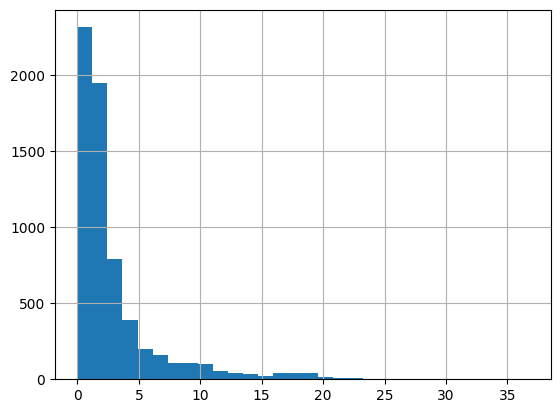

In [33]:
dist = taxis.distance.copy()
dist.hist(bins=30)

In [34]:
# median
dist_median = dist.median()

# Median Absolute Deviation
dist_mad = (dist - dist.median()).abs().mean()

dist_median, dist_mad

(1.64, 2.056104461371055)

In [35]:
# If a distance is larger than: 
# Median + 3 * MAD then it's an outlier
sup_limit = dist_median + 3 * dist_mad
sup_limit

7.808313384113165

In [36]:
taxis['fl_outlier'] = np.where(taxis.distance >= sup_limit, "outlier", "ok")

In [37]:
taxis['fl_outlier'].value_counts()

ok         5841
outlier     592
Name: fl_outlier, dtype: int64

# 9. Use pd.cut to discretize variables

`pd.cut`: Bin values into discrete intervals.

- Use cut when you need to segment and sort data values into bins. 
- This function is also useful for going from a continuous variable to a categorical variable. 

In [38]:
taxis.head(3)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,fl_outlier
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,ok
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,ok
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,ok


<AxesSubplot:>

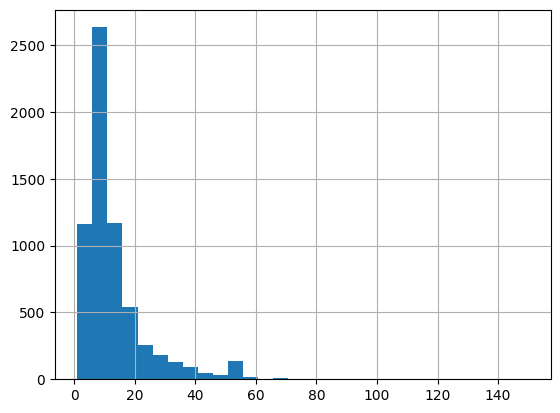

In [39]:
taxis.fare.hist(bins=30)

In [40]:
taxis.fare.quantile(np.arange(0, 1.1, 0.1))

0.0      1.0
0.1      5.0
0.2      6.0
0.3      7.0
0.4      8.0
0.5      9.5
0.6     11.0
0.7     13.5
0.8     17.0
0.9     26.0
1.0    150.0
Name: fare, dtype: float64

```
pd.cut(
    x,
    bins,
    right: 'bool' = True,
    labels=None,
    retbins: 'bool' = False,
    precision: 'int' = 3,
    include_lowest: 'bool' = False,
    duplicates: 'str' = 'raise',
    ordered: 'bool' = True,
)
```

In [47]:
# conver a numeric variable in "user defined" ranges
taxis["fare_levels"] = pd.cut(taxis.fare,                # pass a series
                              [0, 10, 30, np.inf],       # define the values to "break" the data into groups
                              #labels = ['low', "medium", "high"],
                              right=False                # not the default but it's better IMO
                             )

In [48]:
taxis["fare_levels"].value_counts()

[0.0, 10.0)     3420
[10.0, 30.0)    2501
[30.0, inf)      512
Name: fare_levels, dtype: int64

# 10. Use pd.qcut to discretize variables using quantiles

`pd.qcut`: Discretize variable into equal-sized buckets based on rank or based on sample quantiles. 

In [49]:
ranked_fares = taxis.fare.rank(method='first')
ranked_tips = taxis.tip.rank(method='first')

In [50]:
taxis["fare_deciles"] = pd.qcut(ranked_fares, q=10, labels=False, duplicates="drop")
taxis["tip_deciles"] = pd.qcut(ranked_tips, q=10, labels=False, duplicates="drop")

In [51]:
taxis.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,fl_outlier,fare_levels,fare_deciles,tip_deciles
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,ok,"[0.0, 10.0)",2,6
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,ok,"[0.0, 10.0)",0,0
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,ok,"[0.0, 10.0)",3,6
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,ok,"[10.0, 30.0)",9,9
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,ok,"[0.0, 10.0)",4,4


In [53]:
mat = (taxis
 .groupby(["fare_deciles", "tip_deciles"])
 ['distance']
 .mean()
 .unstack(1)
 .fillna(0)
)
mat

tip_deciles,0,1,2,3,4,5,6,7,8,9
fare_deciles,,,,,,,,,,
0,0.627321,0.457681,0.412051,0.523556,0.538109,0.644918,0.598261,0.517778,0.560000,0.000000
1,0.853210,0.781250,0.743585,0.830781,0.777107,0.843386,0.756087,0.873636,0.750000,0.585000
2,1.119259,0.962581,0.986563,1.026500,1.061458,1.040876,1.079908,1.007879,1.291250,0.000000
3,1.297759,1.232281,1.228039,1.269048,1.250000,1.310571,1.241270,1.181842,1.289286,1.600000
4,1.576889,1.475789,1.563182,1.540141,1.515370,1.521864,1.458452,1.632500,1.629722,1.887500
5,1.860290,1.876296,1.797037,1.906038,1.802857,1.918776,1.923913,1.918193,1.961698,2.220000
6,2.286000,2.217797,2.527679,2.546038,2.292000,2.490263,2.464375,2.288268,2.431594,2.627143
7,3.256875,3.063235,3.381045,3.552833,2.943077,3.245429,3.096000,3.183125,3.196913,3.300189
8,4.957833,5.078116,4.949028,5.228936,4.381111,5.166875,4.601429,5.166957,4.365679,5.558025
